In [ ]:
pwd


In [1]:
import pandas as pd
import sklearn as sk
import numpy as np


In [2]:
df = pd.read_csv("train.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Explore

In [3]:
import seaborn as sns

<AxesSubplot:>

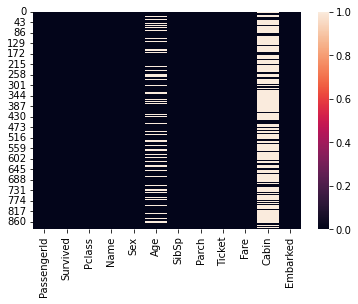

In [4]:
sns.heatmap(df.isnull())

##There are null values in age and cabin

<AxesSubplot:xlabel='Survived', ylabel='count'>

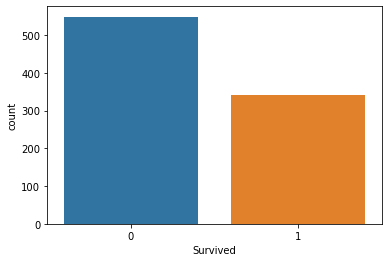

In [5]:
sns.countplot(x='Survived',data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

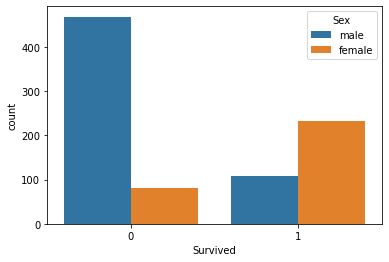

In [6]:
sns.countplot(x='Survived',hue = 'Sex',data = df)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

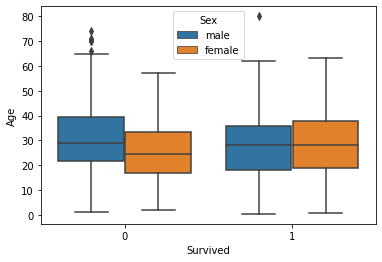

In [7]:
sns.boxplot(x='Survived',y='Age',hue = 'Sex',data = df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

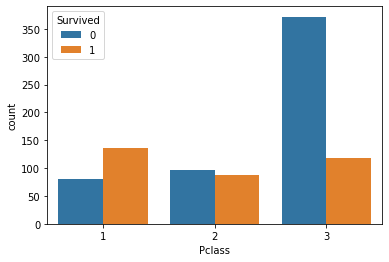

In [8]:
sns.countplot(x='Pclass',hue = 'Survived',data = df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

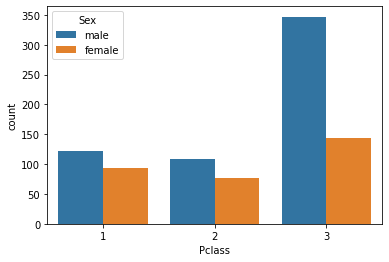

In [9]:
sns.countplot(x='Pclass',hue = 'Sex',data = df)

In [10]:
df_m = df.loc[df['Sex']== 'male']
df_f = df.loc[df['Sex']== 'female']


[Text(0.5, 1.0, 'Age compareison')]

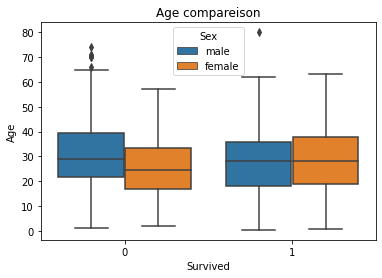

In [11]:
sns.boxplot(x='Survived',y='Age',hue = 'Sex',data = df.loc[df['Age'].isnull() == False]).set(title = 'Age compareison')

[Text(0.5, 1.0, 'Pclass VS Female')]

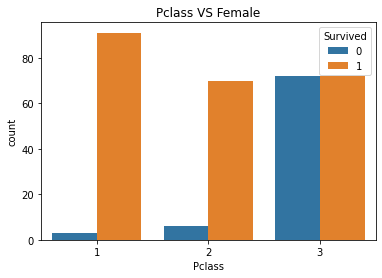

In [12]:
sns.countplot(x='Pclass',hue = 'Survived',data = df_f).set(title = 'Pclass VS Female') 

[Text(0.5, 1.0, 'Pclass VS Male')]

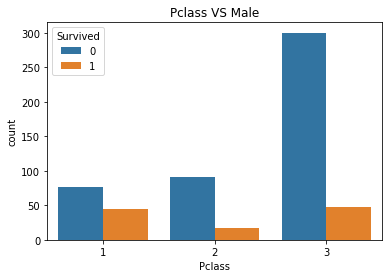

In [13]:
sns.countplot(x='Pclass',hue = 'Survived',data = df_m).set(title = 'Pclass VS Male') 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:

pclass = pd.get_dummies(df[['Pclass']],drop_first=True)
sex = pd.get_dummies(df[['Sex']],drop_first=True)
embarked = pd.get_dummies(df[['Embarked']],drop_first=True)
parch = pd.get_dummies(df[['Parch']],drop_first=True)
sibsb = pd.get_dummies(df[['SibSp']],drop_first=True)

df2 = pd.concat([pclass,sex,df[['Age']],sibsb,parch,df[['Fare']],embarked],axis = 1)
df2.head()

,Pclass,Sex_male,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,1
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,1


In [16]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

## Modeling

In [17]:
import sklearn as sk
from sklearn import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [18]:
mod = LogisticRegression(random_state = 0).fit(df2.loc[df2['Age'].isnull() == False],df.loc[df['Age'].isnull() == False]['Survived'])

/Users/arcadiazero/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
pred = mod.predict(df2.loc[df2['Age'].isnull() == False])
print(classification_report(df.loc[df['Age'].isnull() == False]['Survived'],pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       424
           1       0.78      0.72      0.75       290

    accuracy                           0.81       714
   macro avg       0.80      0.79      0.80       714
weighted avg       0.80      0.81      0.80       714



In [20]:
mod.coef_.flatten()

array([-1.19252825e+00, -2.46377171e+00, -4.26489784e-02, -3.30988092e-01,
       -4.29162386e-02,  1.45973577e-03, -4.58896469e-01, -3.14504129e-01])

In [21]:
import matplotlib as mlt
from matplotlib import pyplot

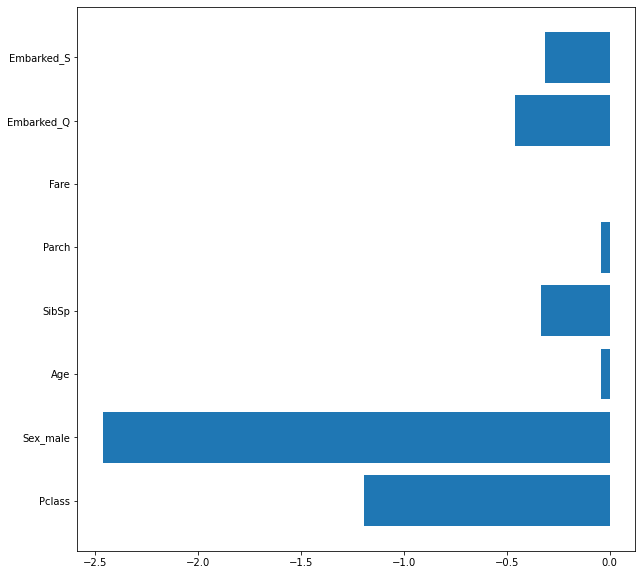

In [22]:
importance = mod.coef_.flatten()
pyplot.rcParams['figure.figsize'] = (10,10)
pyplot.barh(df2.loc[df2['Age'].isnull() == False].columns,importance)
pyplot.show()

In [23]:
## for statistical report
import statsmodels.api as sm

In [24]:
x= df2.loc[df2['Age'].isnull() == False]
y= df.loc[df['Age'].isnull() == False]['Survived']
model = sm.GLM.from_formula("y~x",data = x,family = sm.families.Binomial())
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  714
Model:                            GLM   Df Residuals:                      705
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -316.37
Date:                Sat, 15 Oct 2022   Deviance:                       632.73
Time:                        21:31:47   Pearson chi2:                     738.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3717
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6496      0.635      8.902      0.000       4.406       6.893
x[0]          -1.2005      0.165     -7.288      0.000      -1.523      -0.878
x[1]          -2.6457      0.222    -11.915      0.000      -3.081      -2.210
x[2]          -0.0432      0.008     -5.254      0.000      -0.059      -0.027
x[3]          -0.3638      0.129     -2.816      0.005      -0.617      -0.111
x[4]          -0.0617      0.124     -0.498      0.618      -0.305       0.181
x[5]           0.0014      0.003      0.568      0.570      -0.004       0.006
x[6]          -0.8340      0.600     -1.389      0.165      -2.010       0.343
x[7]          -0.4104      0.270     -1.521      0.128      -0.939       0.118
==============================================================================
"""

In [25]:
x.head()

,Pclass,Sex_male,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,1
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,1


## Tuning hyperparameter

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

In [27]:
parameter = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'random_state':[0,1,2]}
tuning = GridSearchCV(LogisticRegression(),
                      param_grid=parameter,
                     scoring=make_scorer(f1_score, average = 'macro'))
tuning.fit(df2.loc[df2['Age'].isnull() == False],df.loc[df['Age'].isnull() == False]['Survived'])
print(tuning.best_params_)

## got the same model as mod

/Users/arcadiazero/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arcadiazero/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

{'random_state': 0, 'solver': 'lbfgs'}


/Users/arcadiazero/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arcadiazero/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [28]:
## -----> modify data

In [29]:
### from the latest graph, it represents that Age,Fare, and Parch seem insignificant. 
##Then, they will be excluded from the model
df3 = df2
df3.head()

,Pclass,Sex_male,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,1
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,1


In [30]:
del df3['Age'],df3['Fare'],df3['Parch']

In [31]:
df3.head(1)

,Pclass,Sex_male,SibSp,Embarked_Q,Embarked_S
0,3,1,1,0,1


In [32]:
df3.shape

(891, 5)

In [33]:
y2= df['Survived']
y2.shape

(891,)

In [34]:
mod2 = LogisticRegression(random_state = 0).fit(df3,y2)


In [35]:
pred2 = mod2.predict(df3)
print(classification_report(y2,pred2))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       549
           1       0.74      0.70      0.72       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891



In [36]:
print(classification_report(df.loc[df['Age'].isnull() == False]['Survived'],pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       424
           1       0.78      0.72      0.75       290

    accuracy                           0.81       714
   macro avg       0.80      0.79      0.80       714
weighted avg       0.80      0.81      0.80       714



In [37]:
## now we can tell that first model inclunding age,and parch is better to predict
## in case that if any nulls occur in all Age, Parch, and Fare, the model2 will bve selected to use

## Predicting

In [38]:
test = pd.read_csv('Test.csv')

In [39]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [40]:
test = test.drop(['Name','Cabin'],axis = 1)

In [41]:
pclass1 = pd.get_dummies(test[['Pclass']],drop_first=True)
sex1 = pd.get_dummies(test[['Sex']],drop_first=True)
embarked1 = pd.get_dummies(test[['Embarked']],drop_first=True)
parch1 = pd.get_dummies(test[['Parch']],drop_first=True)
sibsb1 = pd.get_dummies(test[['SibSp']],drop_first=True)

test = pd.concat([test[['PassengerId']],pclass1,sex1,test[['Age']],sibsb1,parch1,test[['Fare']],embarked1],axis = 1)
test.head()

,PassengerId,Pclass,Sex_male,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,892,3,1,34.5,0,0,7.8292,1,0
1,893,3,0,47.0,1,0,7.0000,0,1
2,894,2,1,62.0,0,0,9.6875,1,0
3,895,3,1,27.0,0,0,8.6625,0,1
4,896,3,0,22.0,1,1,12.2875,0,1


<AxesSubplot:>

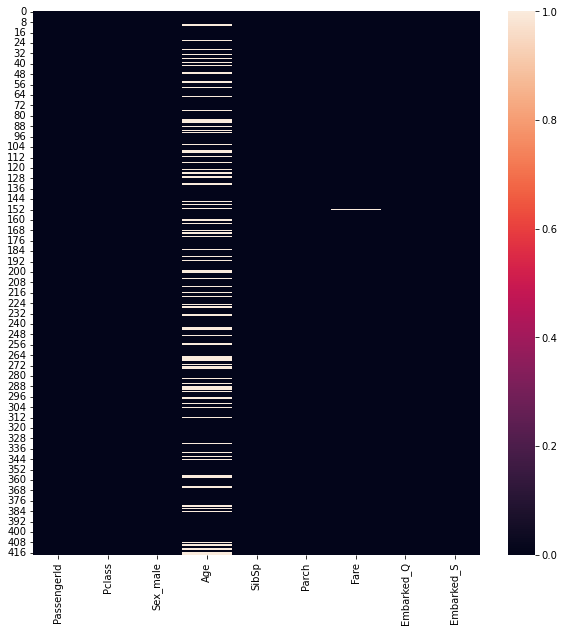

In [42]:
sns.heatmap(data =test.isnull())

In [43]:
test1 = test.loc[test['Age'].isnull()== False]
test1 = test1.loc[test1['Fare'].isnull()==False]


test2 = test.loc[test['Age'].isnull()== True]
#test2 = test2.loc[test2['Fare'].isnull()==True]

In [44]:
test1

,PassengerId,Pclass,Sex_male,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,892,3,1,34.5,0,0,7.8292,1,0
1,893,3,0,47.0,1,0,7.0000,0,1
2,894,2,1,62.0,0,0,9.6875,1,0
3,895,3,1,27.0,0,0,8.6625,0,1
4,896,3,0,22.0,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...,...
409,1301,3,0,3.0,1,1,13.7750,0,1
411,1303,1,0,37.0,1,0,90.0000,1,0
412,1304,3,0,28.0,0,0,7.7750,0,1
414,1306,1,0,39.0,0,0,108.9000,0,0


# for non-null dataset

In [45]:
### for non-nan in age 
pred_test = mod.predict(test1.drop(['PassengerId'],axis = 1))

In [68]:
df_test = pd.DataFrame({'ID':test1['PassengerId'],'Pred' : pred_test})


In [47]:
real = pd.read_csv('gender_submission.csv')
real.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [48]:
lst =[]
for i in test1['PassengerId']:
    for j in range(len(real['PassengerId'])):
        if real['PassengerId'][j] == i:
            pred = real['Survived'][j]
            lst.append(pred)
len(lst)

331

In [49]:
print(classification_report(lst,pred_test))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       204
           1       0.86      0.90      0.88       127

    accuracy                           0.91       331
   macro avg       0.90      0.90      0.90       331
weighted avg       0.91      0.91      0.91       331



# for null dataset

In [50]:
## for nan, occured in Age and Fare
## in this case, the model2 will be used(mod2) or create new models including Parch
test2.head()

,PassengerId,Pclass,Sex_male,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
10,902,3,1,NaN,0,0,7.8958,0,1
22,914,1,0,NaN,0,0,31.6833,0,1
29,921,3,1,NaN,2,0,21.6792,0,0
33,925,3,0,NaN,1,2,23.4500,0,1
36,928,3,0,NaN,0,0,8.0500,0,1


#first model

In [51]:
# use model 2
pred_test2 = mod2.predict(test2.drop(['PassengerId','Age','Parch','Fare'],axis=1))
lst2 =[]
for i in test2['PassengerId']:
    for j in range(len(real['PassengerId'])):
        if real['PassengerId'][j] == i:
            pred = real['Survived'][j]
            lst2.append(pred)
len(lst2)

86

In [52]:
test.shape

(418, 9)

In [69]:
df_test2 = pd.DataFrame({'ID': test2['PassengerId'],'Pred' : pred_test2})

In [54]:
print(classification_report(lst2,pred_test2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        61
           1       0.96      0.96      0.96        25

    accuracy                           0.98        86
   macro avg       0.97      0.97      0.97        86
weighted avg       0.98      0.98      0.98        86



In [55]:
## use new model excluding only Age, and Fare

df4 = pd.concat([pclass,sex,sibsb,parch,embarked],axis = 1)
df4.head()
mod3 = LogisticRegression(random_state=0).fit(df4,df['Survived'])

#2nd model

In [56]:
pred_test3 = mod3.predict(test2.drop(['PassengerId','Age','Fare'],axis=1))

In [57]:
lst3 =[]
for i in test2['PassengerId']:
    for j in range(len(real['PassengerId'])):
        if real['PassengerId'][j] == i:
            pred = real['Survived'][j]
            lst3.append(pred)
len(lst3)

86

In [70]:
df_test2['Pred2'] = pred_test3

In [59]:
print(classification_report(lst3,pred_test3))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        61
           1       0.96      0.92      0.94        25

    accuracy                           0.97        86
   macro avg       0.96      0.95      0.96        86
weighted avg       0.97      0.97      0.96        86



In [64]:
## from the table the first model which has dealed the null dataset is better, then mod2 will be selected


In [74]:
df_test2

,ID,Pred,Pred2
10,902,0,0
22,914,1,1
29,921,0,0
33,925,1,1
36,928,1,1
...,...,...,...
408,1300,1,1
410,1302,1,1
413,1305,0,0
416,1308,0,0


## combine prediction

In [ ]:
df_summit = pd.DataFrame({'ID':real['PassengerId']})
for i in real['PassengerId']:
    for j in df_test['ID']:
        for k in df_test2['ID']:
            if i = j:
                

In [80]:
df_summit = df_test.combine_first(df_test2.drop(['Pred2'],axis =1))
df_summit['Survived'] = real['Survived']
df_summit

,ID,Pred,Survived
0,892,0,0
1,893,0,1
2,894,0,0
3,895,0,0
4,896,1,1
...,...,...,...
413,1305,0,0
414,1306,1,1
415,1307,0,0
416,1308,0,0


In [81]:
print(classification_report(df_summit['Survived'],df_summit['Pred']))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       265
           1       0.88      0.91      0.89       152

    accuracy                           0.92       417
   macro avg       0.91      0.92      0.92       417
weighted avg       0.92      0.92      0.92       417



In [82]:
df_summit.to_csv("Submission.csv")